In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
np.random.seed(0)

In [3]:
n_samples = 500
lag = 3
noise_scale = 0.001

Generate the X series

In [4]:
X = np.random.normal(size=n_samples)

Generate the Y series

In [5]:
Y = np.zeros(n_samples)
Y[lag:] = X[:-lag] + noise_scale * np.random.normal(size=n_samples-lag)  # Y is influenced by X with a certain lag

Stack Y and X (Y first, because we want to see if X Granger-causes Y)

In [6]:
data = np.column_stack([Y, X])

Perform the Granger Causality test

In [7]:
maxlag = 5
test = 'ssr_chi2test'

In [8]:
result = grangercausalitytests(data, maxlag, verbose=False)
p_values = [round(result[i+1][0][test][1],4) for i in range(maxlag)]
print("Lag : p-value")
for i in range(maxlag):
    print(f'{i+1} : {p_values[i]}')

Lag : p-value
1 : 0.2095
2 : 0.3966
3 : 0.0
4 : 0.0
5 : 0.0


C:\Users\i.kagan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Plot the two time series

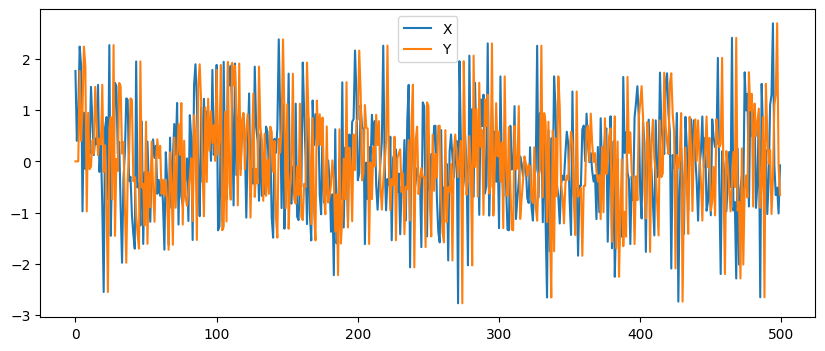

In [9]:
plt.figure(figsize=(10,4))
plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.legend()
plt.show()